In [ ]:
pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import easyocr
import re
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
img_path = 'weightimg.jpg'

In [ ]:
reader = easyocr.Reader(['en'],gpu = False)
result = reader.readtext(img_path)


In [ ]:
result

[([[345, 295], [395, 295], [395, 315], [345, 315]],
  'VAMASHp',
  0.12806854442777973),
 ([[171, 513], [225, 513], [225, 529], [171, 529]],
  'SF_400',
  0.9085285584612629),
 ([[186, 540], [252, 540], [252, 590], [186, 590]], '526', 0.9922397707158708),
 ([[170, 594], [214, 594], [214, 602], [170, 602]],
  'Cadacity',
  0.08164093362550182),
 ([[200, 601], [247, 601], [247, 615], [200, 615]],
  "'19i3sjo7 *0",
  0.035173111493149146)]

In [ ]:
numbers = []
for res in result:
    text = res[1]
    numbers += re.findall(r'\d+', text)

print(numbers)

['400', '526', '19', '3', '7', '0']


In [ ]:
result[2]

([[186, 540], [252, 540], [252, 590], [186, 590]], '526', 0.9922397707158708)

In [ ]:
top_left = tuple(result[2][0][0])
bottom_right = tuple(result[2][0][2])
text = result[2][1]
font = cv2.FONT_HERSHEY_SIMPLEX

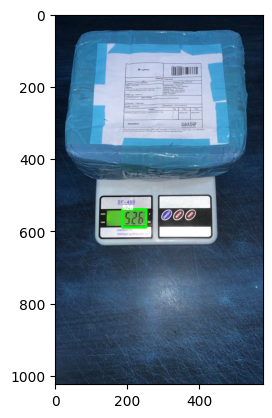

In [ ]:
img = cv2.imread(img_path)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),5)
img = cv2.putText(img,text,top_left,font,.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

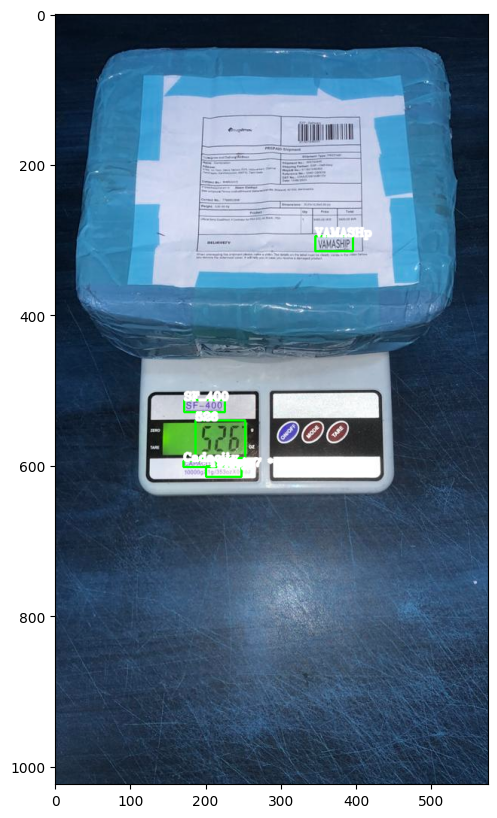

In [ ]:
img = cv2.imread(img_path)
for detection in result:
  top_left = tuple([int(val) for val in detection[0][0]])
  bottom_right = tuple([int(val) for val in detection[0][2]])
  text = detection[1]
  font = cv2.FONT_HERSHEY_COMPLEX
  img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),2)
  img = cv2.putText(img,text,top_left,font,.5,(255,255,255),2,cv2.LINE_AA)
plt.figure(figsize = (10,10))
plt.imshow(img)
plt.show()